In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from random import *

In [13]:
zahl0 = "080886"
zahl1 = randint(20,99)

In [14]:
print("{}-{}".format(zahl0,zahl1))

080886-27


In [15]:
randint(1000000,9999999)

2136647

In [4]:
r_equ = 6378.169
r_pol = 6356.5838
h_sat = 35786


In [29]:
def eccentrictiy(a=r_equ,b=r_pol):
    return (a**2 - b**2) / a**2

def n_phi(phi,h,r_equ,r_pol):
    return r_equ / np.sqrt(1-eccentrictiy(r_equ,r_pol) * np.sin(np.deg2rad(phi))**2)

In [34]:
def geo2cart(lat,lon,h,lon_0 = 9.5,a=r_equ,b=r_pol):
    N = n_phi(lat,h,a,b)
    
    x = (N + h) * np.cos(np.deg2rad(lat))*np.cos(np.deg2rad(lon - lon_0))
    y = (N + h) * np.cos(np.deg2rad(lat))*np.sin(np.deg2rad(lon - lon_0))
    z = (N * (1-eccentrictiy(a,b)) + h) * np.sin(np.deg2rad(lat))
    
    return (x,y,z)

In [57]:
def cart2geo(x,y,z,hs=h_sat,a=r_equ):
    l = a + hs
    lat = np.arctan(z / ((x - l)**2 + y**2))
    lon = -np.arctan(y / (x - l))
    
    return (np.rad2deg(lat),np.rad2deg(lon))

In [53]:
def p_disp(lat_s,lat_s0,lon_s,lon_s0,cx=h_sat/3,cy=h_sat/3):
    return np.sqrt(cy**2*(lat_s - lat_s0)**2 + cx**2 * (lon_s - lon_s0)**2)

In [55]:
h_sat/3

11928.666666666666

In [35]:
x,y,z = geo2cart(51,14,5000)

In [41]:
print(x,y,z)

7146.63037617477 562.4520086496194 8819.081791970473


In [48]:
xh,yh,zh = geo2cart(51,14,5000) 
x0,y0,z0 = geo2cart(51,14,0) 

In [59]:
lat_s, lon_s = cart2geo(xh,yh,zh)
lat_0, lon_0 = cart2geo(x0,y0,z0)

In [61]:
p_d = p_disp(lat_s,lat_s0,lon_s,lon_s0)

In [96]:
H = np.arange(0,15100,100)
lats = np.arange(40,60,5)

In [97]:
lats

array([40, 45, 50, 55])

In [106]:
P = {l:[] for l in lats}
d = {l:[] for l in lats}

for la in lats:
    for hh in H:
        xh,yh,zh = geo2cart(la,9.5,hh) 
        x0,y0,z0 = geo2cart(la,9.5,0) 

        d[la].append(np.sqrt((xh - x0)**2 + (yh - y0)**2 + (zh - z0)**2))
        
        lat_s, lon_s = cart2geo(xh,yh,zh)
        lat_0, lon_0 = cart2geo(x0,y0,z0)

        P[la].append(p_disp(lat_s,lat_s0,lon_s,lon_s0))

In [110]:
d[55]

[0.0,
 100.0000000000004,
 200.00000000000054,
 299.99999999999994,
 400.00000000000006,
 500.00000000000045,
 600.0000000000007,
 700.0,
 800.0000000000001,
 900.0000000000007,
 1000.0000000000005,
 1100.0000000000002,
 1200.0,
 1300.0000000000005,
 1400.000000000001,
 1500.0,
 1600.0000000000002,
 1700.0000000000002,
 1800.0000000000007,
 1900.0000000000005,
 2000.000000000001,
 2100.000000000001,
 2200.0000000000005,
 2300.000000000001,
 2400.000000000001,
 2500.000000000001,
 2600.0000000000005,
 2700.000000000001,
 2800.0000000000014,
 2900.000000000001,
 3000.0000000000005,
 3100.0000000000005,
 3200.000000000001,
 3300.0000000000014,
 3400.0000000000005,
 3500.000000000001,
 3600.000000000001,
 3700.0000000000014,
 3800.000000000001,
 3900.0,
 4000.000000000001,
 4100.0,
 4200.000000000001,
 4300.000000000001,
 4400.0,
 4500.000000000002,
 4600.0,
 4700.0,
 4800.000000000002,
 4900.0,
 5000.000000000002,
 5100.000000000001,
 5200.0,
 5300.000000000002,
 5400.000000000001,
 5500.

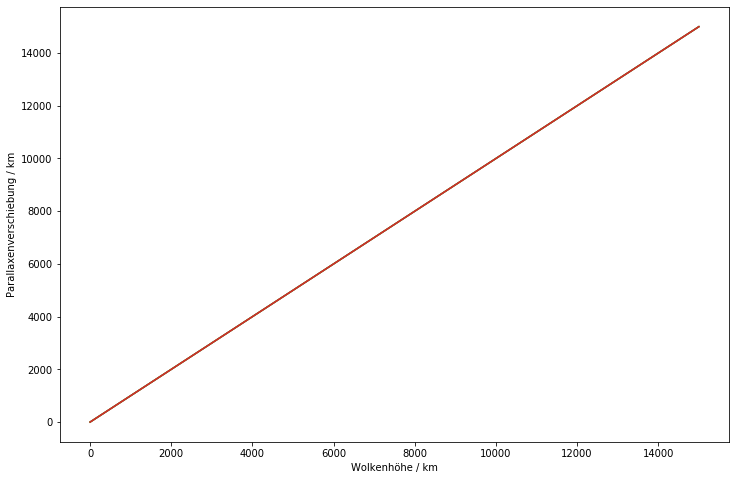

In [107]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
for la in lats:
    ax.plot(H,d[la])
    ax.set_xlabel("Wolkenhöhe / km")
    ax.set_ylabel("Parallaxenverschiebung / km")

In [80]:
d

[0.0,
 0.09999999999987179,
 0.19999999999974358,
 0.2999999999996126,
 0.3999999999994843,
 0.4999999999993533,
 0.60000000000022,
 0.6999999999993822,
 0.7999999999999609,
 0.8999999999991258,
 0.9999999999997016,
 1.0999999999998586,
 1.1999999999994424,
 1.2999999999996021,
 1.399999999999186,
 1.499999999999343,
 1.600000000000207,
 1.6999999999990838,
 1.7999999999999479,
 1.8999999999988246,
 1.9999999999996911,
 2.099999999999848,
 2.199999999999432,
 2.299999999999589,
 2.399999999999173,
 2.49999999999933,
 2.5999999999999086,
 2.6999999999990734,
 2.7999999999999376,
 2.899999999999521,
 2.999999999999678,
 3.0999999999995502,
 3.199999999999419,
 3.2999999999992906,
 3.3999999999991624,
 3.499999999999738,
 3.599999999999898,
 3.6999999999997675,
 3.7999999999996388,
 3.899999999999508,
 3.9999999999993796,
 4.100000000000244,
 4.19999999999912,
 4.299999999999987,
 4.399999999998864,
 4.499999999999727,
 4.599999999999885,
 4.699999999999468,
 4.799999999999626,
 4.8999999

In [72]:
h_sat / 3

11928.666666666666

In [73]:
np.sqrt((xh - x0)**2 + (yh - y0)**2 + (zh - z0)**2)

14.999999999999668

In [74]:
cart2geo(xh,yh,zh)

(0.0001947080695793426, 0.47510751603849266)

In [76]:
cart2geo(x0,y0,z0)

(0.00019415333030437914, 0.47387821088492166)